### Fitting a Bernoulli mixture model with known number of groups

Learning algorithm: Maximum likelihood using Expectation Maximization (EM) algorithm

In [1]:
import os, pickle, copy
import numpy as np
from numpy import log, sum, exp, prod
from numpy.random import beta, binomial, dirichlet, uniform, gamma, seed, multinomial
import matplotlib.pyplot as plt

os.chdir("C:\\Users\\Alexander\\Documents\\\Github\\bmm_mix")

from bernmix.utils import bmm_utils as bmm

Simulate data from data generating process:

In [27]:
#seed(12)

N = 2000         # number of observations  
K = 3            # number of mixture components
D = 10           # dimensions / number of features     

# True states of unknown parameters:
alphas = gamma(shape=1, size=K)                            # shape parameter
p_true = dirichlet(alpha = alphas, size = 1)[0]              # mixture weights
theta_true = beta(a = .7, b = .9, size = K*D).reshape(D,K)           # success probabilities for Bernoulli distributions

In [28]:
X, Z = bmm.sample_bmm(N, p_true, theta_true)    # Generate data from mixture model

print(Z.shape)
print(X.shape)

Sampling from 10 dimensional Bernoulli mixture with 3 mixture components.
Number of random draws: 2000
(2000, 3)
(2000, 10)


Set initial values for parameters:

In [9]:
D = X.shape[1]
alphas = gamma(shape=1, size=K)               # shape parameters
p_0 = dirichlet(alpha = alphas, size = 1)[0]
#p_0 = np.array([1/K]*K)  
theta_0 = beta(a = 1, b = 1, size = K*D).reshape(D,K)

Run EM algorithm:

In [23]:
logli, p_em, theta_em = bmm.mixture_EM(X = X, p_0 = p_0, theta_0 = theta_0, n_iter = 200, stopcrit = 10**(-3))

0 - delta LL.: 15414.57728692429
5 - delta LL.: 16.988249239157085
10 - delta LL.: 7.478663912261254
15 - delta LL.: 1.967139352205777
20 - delta LL.: 0.47806085371848894
25 - delta LL.: 0.19742302736813144
30 - delta LL.: 0.13481564969515603
35 - delta LL.: 0.10838660455556237
40 - delta LL.: 0.08621575461438624
45 - delta LL.: 0.06283907306351466
50 - delta LL.: 0.041183246477885405
55 - delta LL.: 0.02487748575003934
60 - delta LL.: 0.014446334105741698
65 - delta LL.: 0.008378817361517577
70 - delta LL.: 0.004978520250006113
75 - delta LL.: 0.0030710325390828075
80 - delta LL.: 0.0019787996734521585
85 - delta LL.: 0.0013362433292058995
90 - delta LL.: 0.0009479718773945933
Stop criterion applied!
0.0007472034012607764


Plot loglikelihood function:

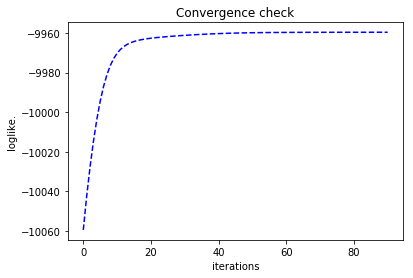

In [24]:
burn_in = 5          # leave out burn-in period for nicer plotting

plt.plot(logli[burn_in:], 'b--')
plt.title("Convergence check")
plt.xlabel('iterations')
plt.ylabel('loglike.')
plt.show()

Compare estimates with true parameters:

In [25]:
print(p_em)
print(p_true)

[0.21945802 0.4762448  0.30429718]
[0.23240886 0.76568648 0.00190466]


In [26]:
print(theta_em)
print(theta_true)

[[0.94075718 0.56522673 0.54012003]
 [0.6633558  0.7788261  0.85445869]
 [0.08492253 0.0118448  0.01058849]
 [0.7619109  0.64269152 0.79104922]
 [0.16237858 0.16763477 0.17426888]
 [0.14479892 0.26510655 0.08369153]
 [0.02675289 0.84875699 0.74076518]
 [0.62418071 0.11471043 0.17051847]
 [0.08057012 0.90111508 0.78432166]
 [0.89059738 0.58478808 0.81022434]]
[[0.92069346 0.53252752 0.02172631]
 [0.64288011 0.8077188  0.7868622 ]
 [0.12518845 0.00968394 0.73280002]
 [0.76260393 0.69348917 0.94485124]
 [0.16662236 0.16787246 0.52809366]
 [0.15747913 0.19110488 0.97463254]
 [0.02657571 0.81861426 0.6890829 ]
 [0.62428758 0.13806617 0.91782955]
 [0.11782045 0.86312417 0.26016286]
 [0.89088601 0.67407466 0.00886093]]
